##Task 1

E22CSEU0750,Hasbi Fathima vP

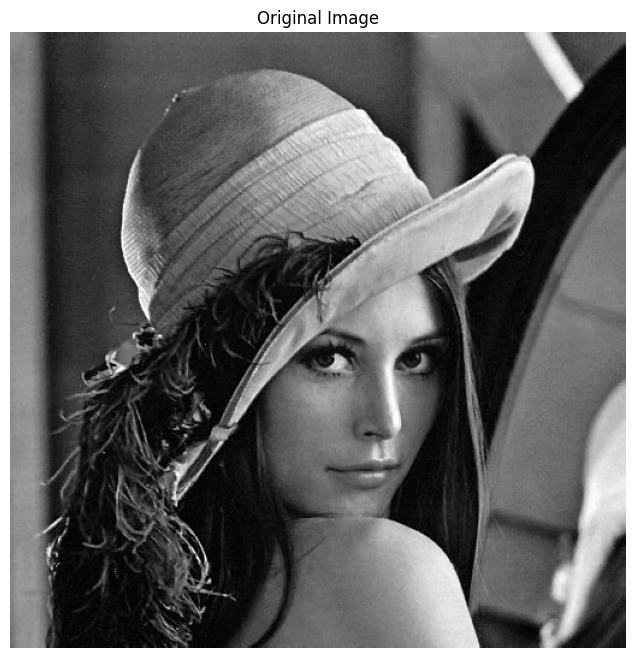

In [6]:
import cv2
from matplotlib import pyplot as plt

# Load the original image
image = cv2.imread("Picture2.jpg")
# Convert from BGR to RGB for correct color representation
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


##Interpolation Methods

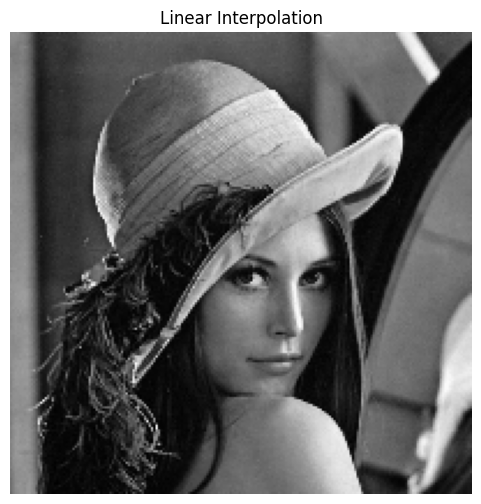

In [ ]:
# Resize using linear interpolation
linear_resized = cv2.resize(image_rgb, (200, 200), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(6, 6))
plt.imshow(linear_resized)
plt.title("Linear Interpolation")
plt.axis("off")
plt.show()


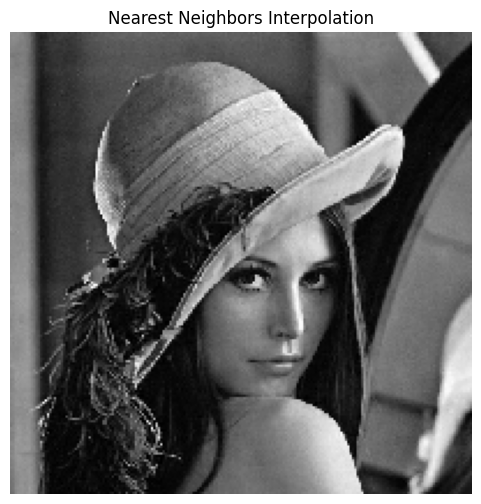

In [ ]:
# Resize using nearest neighbors interpolation
nearest_resized = cv2.resize(image_rgb, (200, 200), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(6, 6))
plt.imshow(nearest_resized)
plt.title("Nearest Neighbors Interpolation")
plt.axis("off")
plt.show()


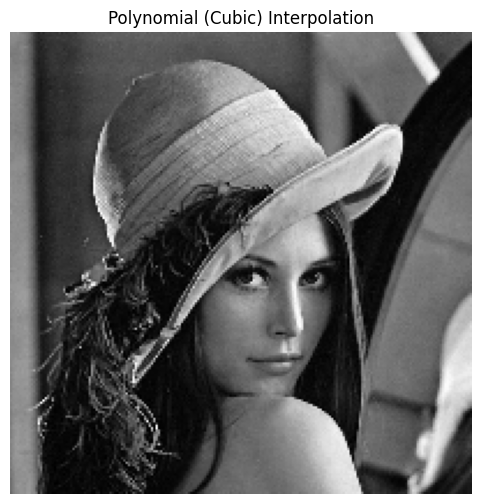

In [ ]:
# Resize using polynomial (cubic) interpolation
polynomial_resized = cv2.resize(image_rgb, (200, 200), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(6, 6))
plt.imshow(polynomial_resized)
plt.title("Polynomial (Cubic) Interpolation")
plt.axis("off")
plt.show()


##Image blurring

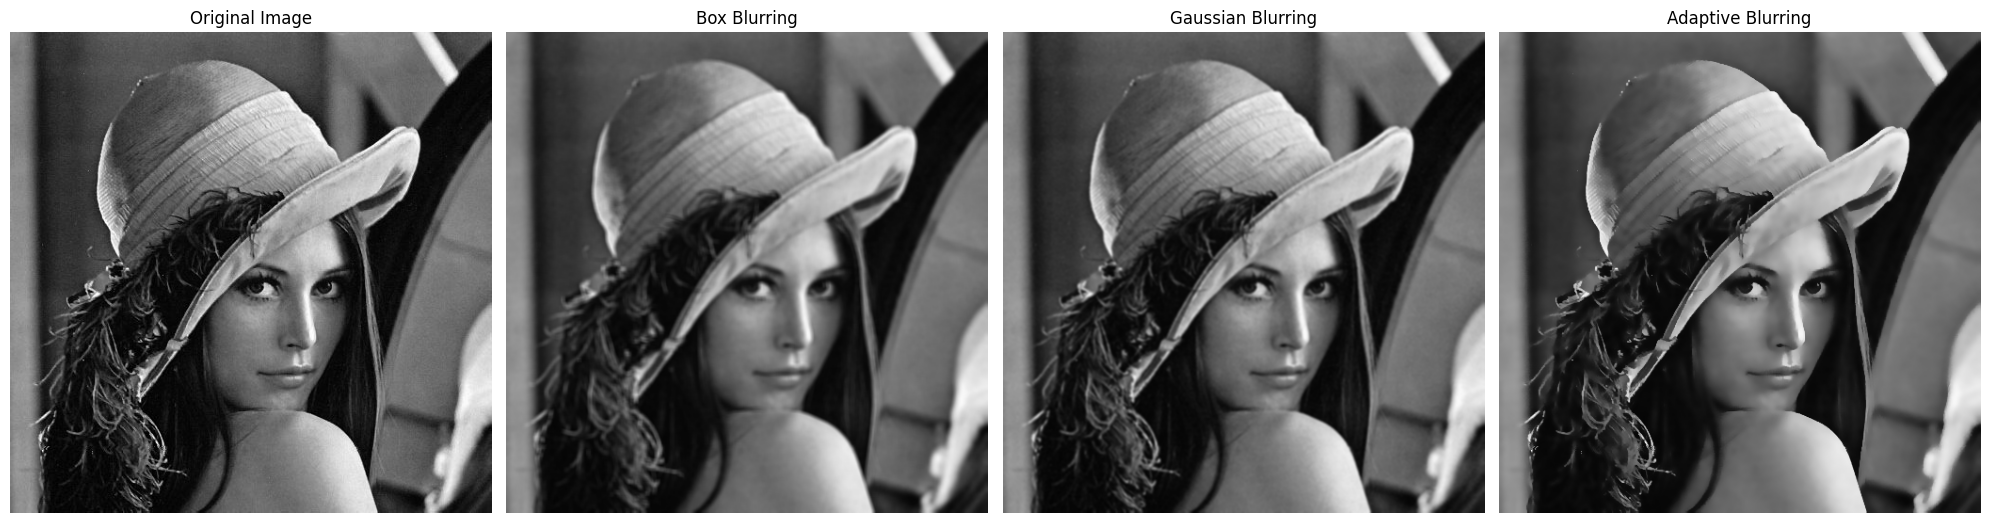

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the original image
image = cv2.imread("Picture2.jpg")
# Convert from BGR to RGB for correct color representation
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1.2.1 Box Blurring
box_blurred = cv2.blur(image_rgb, (5, 5))

# 1.2.2 Gaussian Blurring
gaussian_blurred = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# 1.2.3 Adaptive (Bilateral) Blurring
adaptive_blurred = cv2.bilateralFilter(image_rgb, 9, 75, 75)

# Display images side by side
plt.figure(figsize=(20, 8))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Box Blurring
plt.subplot(1, 4, 2)
plt.imshow(box_blurred)
plt.title("Box Blurring")
plt.axis("off")

# Gaussian Blurring
plt.subplot(1, 4, 3)
plt.imshow(gaussian_blurred)
plt.title("Gaussian Blurring")
plt.axis("off")

# Adaptive (Bilateral) Blurring
plt.subplot(1, 4, 4)
plt.imshow(adaptive_blurred)
plt.title("Adaptive Blurring")
plt.axis("off")

plt.tight_layout()
plt.show()


##Task 2

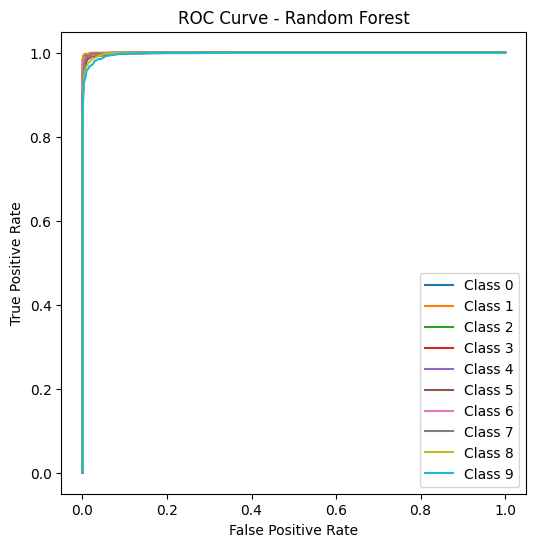

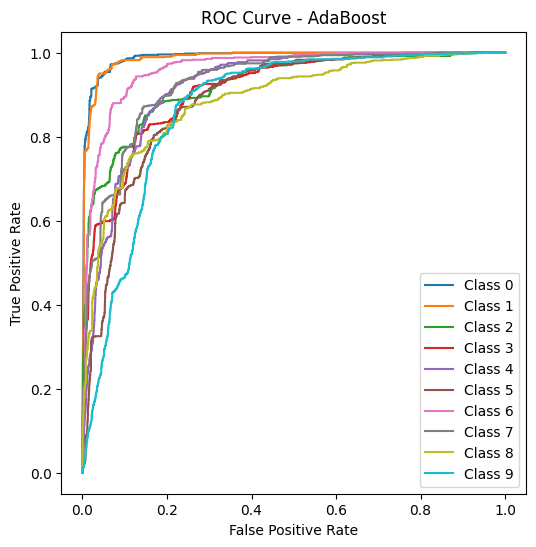

Model: Random Forest
Accuracy: 0.9705
Precision: 0.9705
Recall: 0.9705
F1 Score: 0.9705
Confusion Matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  990    2    9]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]
ROC AUC: 0.9991
Model: AdaBoost
Accuracy: 0.5756
Precision: 0.6266
Recall: 0.5756
F1 Score: 0.5771
Confusion Matrix:
[[584   2  22   7  12 285  15   7  45   1]
 [  0 368 248 446   1   6   3   8  53   2]
 [ 10  12 696  38  19  12  79  22 128  16]
 [ 10   5  38 661   5 107  13  16 143  12]
 [  3   0  14  23 499  13   8  67  29 326]
 [ 12   5  24 145  65 449  16  

In [7]:
import numpy as np
import struct
import os
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

# Function to read IDX files
def read_idx(filename):
    """Read an IDX file and return the data as a NumPy array"""
    with open(filename, 'rb') as f:
        # Read magic number (4 bytes) and number of items (4 bytes)
        magic_number, num_items = struct.unpack(">II", f.read(8))

        # Handle images (type 2051) or labels (type 2049)
        if magic_number == 2051:  # Images
            rows, cols = struct.unpack(">II", f.read(8))  # Read number of rows and columns
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, rows, cols)
        elif magic_number == 2049:  # Labels
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError("Invalid IDX magic number.")
    return data

# Load the training and testing data
train_images = read_idx('train-images.idx3-ubyte')
train_labels = read_idx('train-labels.idx1-ubyte')
test_images = read_idx('t10k-images.idx3-ubyte')
test_labels = read_idx('t10k-labels.idx1-ubyte')

# Flatten the images into 2D arrays for classification
X_train = train_images.reshape(train_images.shape[0], -1)  # Flatten each image (28x28) to 784
y_train = train_labels

X_test = test_images.reshape(test_images.shape[0], -1)  # Flatten each image (28x28) to 784
y_test = test_labels

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "ROC AUC": roc_auc
    }

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    for i in range(10):  # 10 classes in MNIST
        fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print("="*50)